In [1]:
import glob
from func import *
from utils import read_pkl
import pandas as pd
import csv
import numpy as np
from collections import Counter
import tqdm
from argparse import ArgumentParser
import sys 
sys.path.append("..") 
from utils import *

# Tree reconstruction

We do not provide the scripts for analyzing the gold trees from treebanks. The script is similar to the current code we provide.

## English sentence

In [2]:
def convert_to_chance_level(target, n_deletion, N=1000):

    tok_lst = target.split(' ')
    chance_idx_dict_lst = []
    for _ in tqdm.tqdm(range(N)):
        within_deletion =[]
        for _ in range(n_deletion):
            indices = random.sample(list(range(len(tok_lst) + 1)), 2)
            while abs(indices[1] - indices[0]) == len(tok_lst):
                 indices = random.sample(list(range(len(tok_lst) + 1)), 2)
            if indices[0] > indices[1]:
                indices[1], indices[0] = indices[0], indices[1]
            tmp = list(range(indices[0], indices[1]))
            tmp = list(map(str, tmp))
            tmp = '-'.join(tmp)
            within_deletion.append(tmp)
        chance_idx_dict_lst.append(Counter(within_deletion))
    return chance_idx_dict_lst

target_file = pd.read_csv(f"stimulus/test_sentence/english.csv",
                delimiter='\t',
                quoting=csv.QUOTE_NONE,
                quotechar=None,)

target_lst = target_file['target'].values.tolist()

## chatgpt & chance
gpt_tree_lst = []
chance_lst = []
for idx, target in enumerate(target_lst):
    target_id = idx
    
    resp_file = pd.read_csv(f"result/english/chatgpt/target_{target_id}.csv",
                    delimiter='\t',
                    quoting=csv.QUOTE_NONE,
                    quotechar=None,)
    
    result = list(zip(resp_file['original'].values.tolist(),
                    resp_file['label'].values.tolist(),
                    resp_file['prediction'].values.tolist(),))
    item_lst, idx_dict = extract_ellipsis_item(result)
    cky_tree = cky(target, idx_dict)
    gpt_tree_lst.append(cky_tree)
    chance_idx_dict_lst = convert_to_chance_level(target, len(result), 1000)
    chance_tree = []
    for chance_idx_dict in chance_idx_dict_lst:
        chance_tree.append(cky(target, chance_idx_dict))
    chance_lst.append(chance_tree)

## human
human_tree_lst = []

for idx, target in enumerate(target_lst):
    if idx == 12:
        break
    target_id = idx

    resp_file = pd.read_csv(f"result/english/human/target_{target_id}.csv",
                    delimiter='\t',
                    quoting=csv.QUOTE_NONE,
                    quotechar=None,)
    result = list(zip(resp_file['original'].values.tolist(),
                    resp_file['label'].values.tolist(),
                    resp_file['prediction'].values.tolist(),))
    item_lst, idx_dict = extract_ellipsis_item(result)
    cky_tree = cky(target, idx_dict)
    human_tree_lst.append(cky_tree)
    

100%|██████████| 1000/1000 [00:01<00:00, 624.95it/s]


## Chinese sentence

In [19]:
def convert_to_chance_level(target, n_deletion, N=1000):

    tok_lst = list(target)
    chance_idx_dict_lst = []
    for _ in tqdm.tqdm(range(N)):
        within_deletion =[]
        for _ in range(n_deletion):
            indices = random.sample(list(range(len(tok_lst) + 1)), 2)
            while abs(indices[1] - indices[0]) == len(tok_lst):
                 indices = random.sample(list(range(len(tok_lst) + 1)), 2)
            if indices[0] > indices[1]:
                indices[1], indices[0] = indices[0], indices[1]
            tmp = list(range(indices[0], indices[1]))
            tmp = list(map(str, tmp))
            tmp = '-'.join(tmp)
            within_deletion.append(tmp)
        chance_idx_dict_lst.append(Counter(within_deletion))
    return chance_idx_dict_lst
target_file = pd.read_csv(f"stimulus/test_sentence/chinese.csv",
                delimiter='\t',
                quoting=csv.QUOTE_NONE,
                quotechar=None,)

target_lst_zh = target_file['target'].values.tolist()

## chatgpt & chance
gpt_tree_lst_zh = []
chance_lst_zh = []
for idx, target in enumerate(target_lst_zh):
    target_id = idx
    
    resp_file = pd.read_csv(f"result/chinese/chatgpt/target_{target_id}.csv",
                    delimiter='\t',
                    quoting=csv.QUOTE_NONE,
                    quotechar=None,)
    
    result = list(zip(resp_file['original'].values.tolist(),
                    resp_file['label'].values.tolist(),
                    resp_file['prediction'].values.tolist(),))
    item_lst, idx_dict = extract_ellipsis_item_ctb(result)
    cky_tree = cky(target, idx_dict)
    gpt_tree_lst_zh.append(cky_tree)
    chance_idx_dict_lst = convert_to_chance_level(target, len(result), 100)
    chance_tree = []
    for chance_idx_dict in chance_idx_dict_lst:
        chance_tree.append(cky(target, chance_idx_dict))
    chance_lst_zh.append(chance_tree)
## human
# the path can be changed to l2, to replicate the results of l2 speakers
human_tree_lst_zh = []

for idx, target in enumerate(target_lst_zh):
    if idx == 12:
        break
    target_id = idx

    resp_file = pd.read_csv(f"result/chinese/human/target_{target_id}.csv",
                    delimiter='\t',
                    quoting=csv.QUOTE_NONE,
                    quotechar=None,)
    result = list(zip(resp_file['original'].values.tolist(),
                    resp_file['label'].values.tolist(),
                    resp_file['prediction'].values.tolist(),))
    item_lst, idx_dict = extract_ellipsis_item_ctb(result)
    cky_tree = cky(target, idx_dict)
    human_tree_lst_zh.append(cky_tree)

100%|██████████| 100/100 [00:00<00:00, 282.55it/s]


# Tree visualization

## English sentence

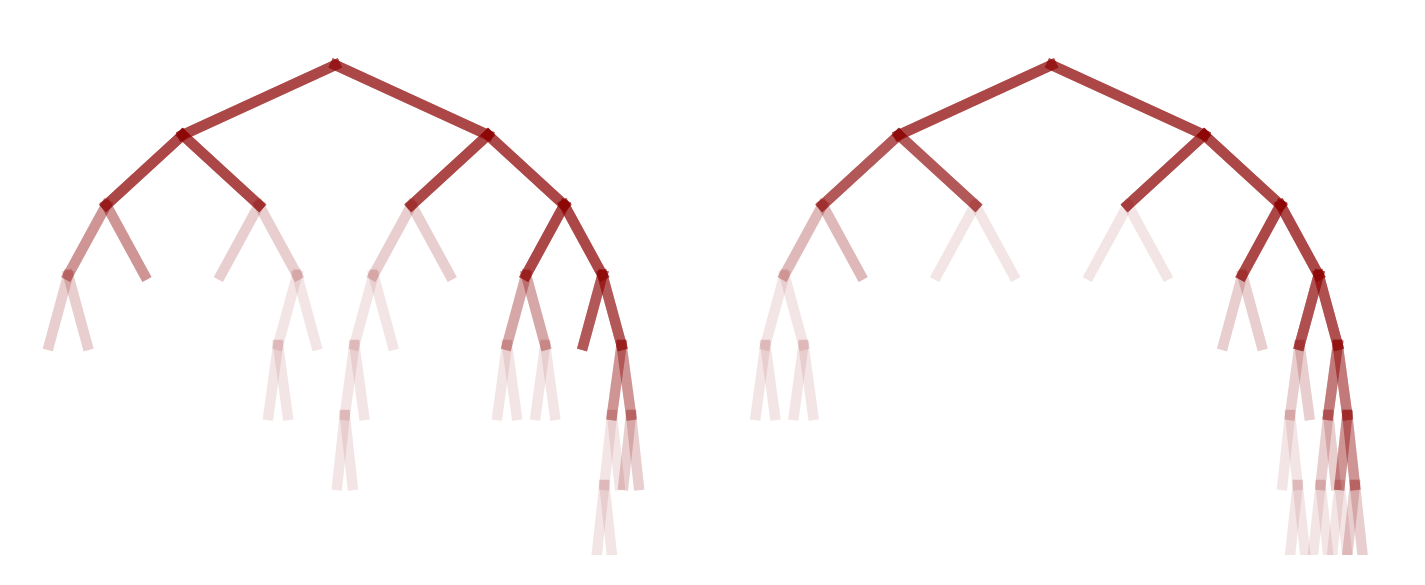

In [18]:
# plot each tree
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 15
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
plt.rc('font',family='Times New Roman')
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
point1 = [1, 2]
point2 = [3, 4]
fig, axes = plt.subplots(1, 2, sharey=True,  figsize=(5,2.2))

def tree_to_plot(root:EllipsisTreeNode, return_dict = False):
    node_lst = [root]
    origin = [0, 0]
    child_pos = dict()
    child_pos[root.name] = origin
    depth = 0
    interval = 8
    edge_lst = []
    while True:
        tmp = []
        interval = max(0.2, interval/2)
        for node in node_lst:
            node_pos = child_pos[node.name]
            child_lst = list(node.child.keys())
            if not child_lst:
                continue
            child_lst = sorted(child_lst, key=lambda x: int(x.split('-')[0]))
            assert len(child_lst) == 2 
            # left child
            child_pos[node.child[child_lst[0]].name] = [node_pos[0] - 1, node_pos[1] - interval]
            # right child 
            child_pos[node.child[child_lst[1]].name] = [node_pos[0] - 1, node_pos[1] + interval]
            tmp.append(node.child[child_lst[0]])
            tmp.append(node.child[child_lst[1]])
            edge_lst.append([node_pos, child_pos[node.child[child_lst[0]].name]] )
            edge_lst.append([node_pos, child_pos[node.child[child_lst[1]].name]] )
        if not tmp:
            break
        depth += 1
        node_lst = tmp
    if return_dict:
        return edge_lst, child_pos
    return edge_lst
axes = axes.flatten()
for idx, (gpt_tree, human_tree, target) in enumerate(zip(gpt_tree_lst,
                                                        human_tree_lst,
                                                        target_lst
                                                        )):
    # for comparison, only top 12 sentences are visualized
    if idx == 12:
        break
    gpt_edge = tree_to_plot(gpt_tree)
    human_edge = tree_to_plot(human_tree)

    for edge in gpt_edge:
        y_values = [edge[0][0], edge[1][0]]
        x_values = [edge[0][1], edge[1][1]]
        axes[0].plot(x_values, y_values,color='darkred',markersize=6, linestyle="-", alpha=0.1, lw=2.5)
    axes[0].set(ylim = [-7,0.5])
    axes[0].set(xlim= [-8,9])
    axes[0].set(xticklabels=[])
    axes[0].set(yticklabels=[])
    axes[0].tick_params(bottom=False,top=False,left=False,right=False)
    axes[0].set_frame_on(False)
    
    for edge in human_edge:
        y_values = [edge[0][0], edge[1][0]]
        x_values = [edge[0][1], edge[1][1]]
        axes[1].plot(x_values, y_values,color='darkred',markersize=6, linestyle="-", alpha=0.1, lw=2.5)
    axes[1].set(ylim= [-7,0.5])
    axes[1].set(xlim= [-8,9])
    axes[1].set(xticklabels=[])
    axes[1].set(yticklabels=[])
    axes[1].tick_params(bottom=False,top=False,left=False,right=False)
    axes[1].set_frame_on(False)
    # display_tree(cky_parsed, target)
    # display_tree(bina_tree, target)
    # break


plt.tight_layout()

## Chinese sentence

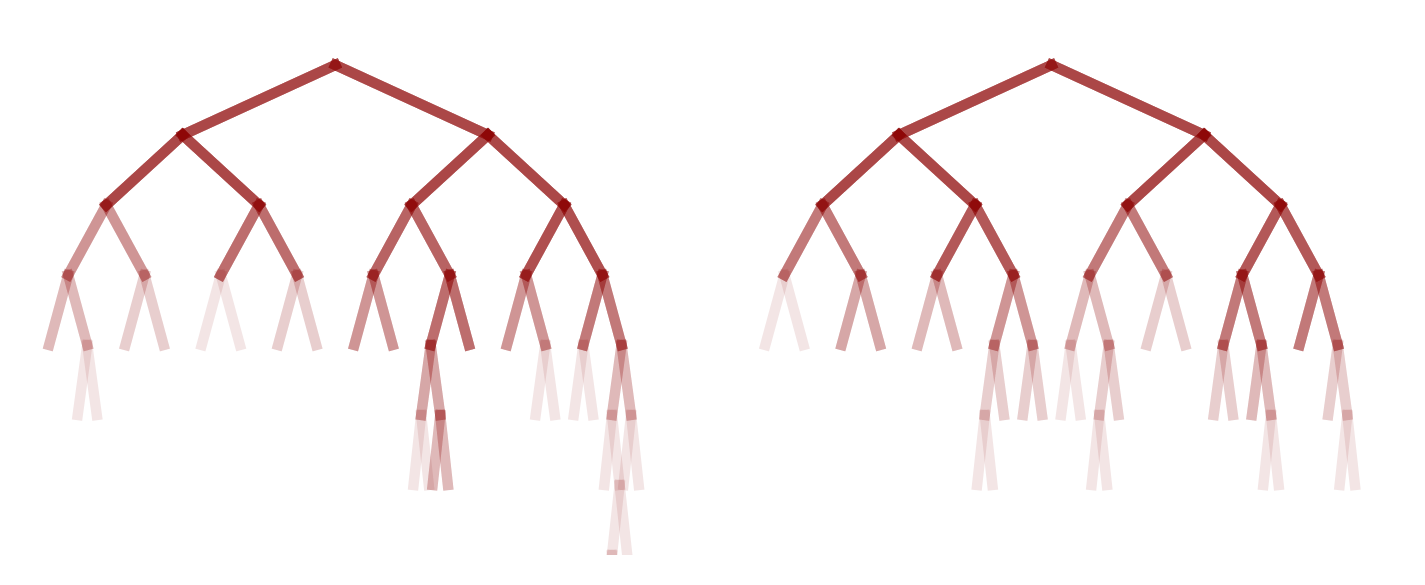

In [20]:
point1 = [1, 2]
point2 = [3, 4]
fig, axes = plt.subplots(1, 2, sharey=True,  figsize=(5,2.2))

axes = axes.flatten()
for idx, (gpt_tree, human_tree, target) in enumerate(zip(gpt_tree_lst_zh,
                                                        human_tree_lst_zh,
                                                        target_lst_zh
                                                        )):
    if idx == 12:
        break
    gpt_edge = tree_to_plot(gpt_tree)
    human_edge = tree_to_plot(human_tree)

    for edge in gpt_edge:
        y_values = [edge[0][0], edge[1][0]]
        x_values = [edge[0][1], edge[1][1]]
        axes[0].plot(x_values, y_values,color='darkred',markersize=6, linestyle="-", alpha=0.1, lw=2.5)
    axes[0].set(ylim = [-7,0.5])
    axes[0].set(xlim= [-8,9])
    axes[0].set(xticklabels=[])
    axes[0].set(yticklabels=[])
    axes[0].tick_params(bottom=False,top=False,left=False,right=False)
    axes[0].set_frame_on(False)
    
    for edge in human_edge:
        y_values = [edge[0][0], edge[1][0]]
        x_values = [edge[0][1], edge[1][1]]
        axes[1].plot(x_values, y_values,color='darkred',markersize=6, linestyle="-", alpha=0.1, lw=2.5)
    axes[1].set(ylim= [-7,0.5])
    axes[1].set(xlim= [-8,9])
    axes[1].set(xticklabels=[])
    axes[1].set(yticklabels=[])
    axes[1].tick_params(bottom=False,top=False,left=False,right=False)
    axes[1].set_frame_on(False)
    # display_tree(cky_parsed, target)
    # display_tree(bina_tree, target)
    # break


plt.tight_layout()

# Explained ratio for behavior

## English sentence

In [21]:

# behavior of ChatGPT
gpt_behavior_explained = []
for idx, (target, gpt_tree, chance_tree, human_tree) in enumerate(zip(target_lst, 
                                                            gpt_tree_lst,
                                                            chance_lst, 
                                                            human_tree_lst * 5)):

    target_id = idx
    
    resp_file = pd.read_csv(f"result/english/chatgpt/target_{target_id}.csv",
                    delimiter='\t',
                    quoting=csv.QUOTE_NONE,
                    quotechar=None,)
    
    result = list(zip(resp_file['original'].values.tolist(),
                    resp_file['label'].values.tolist(),
                    resp_file['prediction'].values.tolist(),))
    item_lst, idx_dict = extract_ellipsis_item(result)
    # print(idx_dict)
    total = 0
    tmp = {}
    for key in idx_dict:
        if len(key.split('-')) == 1:
            continue
        total += idx_dict[key]
        tmp[key] = idx_dict[key]
    score_dict = {key: score / total for key, score in tmp.items()}
    # print(score_dict)
    gpt_span = tree_to_span(gpt_tree)
    human_span = tree_to_span(human_tree)
    chance_score = []
    for tree in chance_tree:
        chance_span = tree_to_span(tree)
        chance_score.append(compute_score(chance_span, score_dict))
    gpt_behavior_explained.append(
        [compute_score(gpt_span, score_dict), 
        compute_score(human_span, score_dict),
        chance_score])

# behavior of human
human_behavior_explained = []
for idx, (target, gpt_tree, chance_tree, human_tree) in enumerate(zip(target_lst, 
                                                            gpt_tree_lst,
                                                            chance_lst, 
                                                            human_tree_lst * 5)):

    if idx == 12:
        break

    target_id = idx
    resp_file = pd.read_csv(f"result/english/human/target_{target_id}.csv",
                    delimiter='\t',
                    quoting=csv.QUOTE_NONE,
                    quotechar=None,)
    result = list(zip(resp_file['original'].values.tolist(),
                    resp_file['label'].values.tolist(),
                    resp_file['prediction'].values.tolist(),))
    item_lst, idx_dict = extract_ellipsis_item(result)

    
    # print(idx_dict)
    total = 0
    tmp = {}
    for key in idx_dict:
        if len(key.split('-')) == 1:
            continue
        total += idx_dict[key]
        tmp[key] = idx_dict[key]
    score_dict = {key: score / total for key, score in tmp.items()}
    # print(score_dict)
    gpt_span = tree_to_span(gpt_tree)
    human_span = tree_to_span(human_tree)
    chance_score = []
    for tree in chance_tree:
        chance_span = tree_to_span(tree)
        chance_score.append(compute_score(chance_span, score_dict))
    human_behavior_explained.append(
        [compute_score(gpt_span, score_dict), 
        compute_score(human_span, score_dict),
        chance_score])


## Chinese sentence

In [ ]:

# behavior of ChatGPT
gpt_behavior_explained_zh = []
for idx, (target, gpt_tree, chance_tree, human_tree) in enumerate(zip(target_lst_zh, 
                                                            gpt_tree_lst_zh,
                                                            chance_lst_zh, 
                                                            human_tree_lst_zh * 5)):

    target_id = idx
    
    resp_file = pd.read_csv(f"result/chinese/chatgpt/target_{target_id}.csv",
                    delimiter='\t',
                    quoting=csv.QUOTE_NONE,
                    quotechar=None,)
    
    result = list(zip(resp_file['original'].values.tolist(),
                    resp_file['label'].values.tolist(),
                    resp_file['prediction'].values.tolist(),))
    item_lst, idx_dict = extract_ellipsis_item_ctb(result)
    # print(idx_dict)
    total = 0
    tmp = {}
    for key in idx_dict:
        if len(key.split('-')) == 1:
            continue
        total += idx_dict[key]
        tmp[key] = idx_dict[key]
    score_dict = {key: score / total for key, score in tmp.items()}
    # print(score_dict)
    gpt_span = tree_to_span(gpt_tree)
    human_span = tree_to_span(human_tree)
    chance_score = []
    for tree in chance_tree:
        chance_span = tree_to_span(tree)
        chance_score.append(compute_score(chance_span, score_dict))
    gpt_behavior_explained_zh.append(
        [compute_score(gpt_span, score_dict), 
        compute_score(human_span, score_dict),
        chance_score])

# behavior of human
human_behavior_explained_zh = []
for idx, (target, gpt_tree, chance_tree, human_tree) in enumerate(zip(target_lst_zh, 
                                                            gpt_tree_lst_zh,
                                                            chance_lst_zh, 
                                                            human_tree_lst_zh * 5)):

    if idx == 12:
        break

    target_id = idx
    resp_file = pd.read_csv(f"result/chinese/human/target_{target_id}.csv",
                    delimiter='\t',
                    quoting=csv.QUOTE_NONE,
                    quotechar=None,)
    result = list(zip(resp_file['original'].values.tolist(),
                    resp_file['label'].values.tolist(),
                    resp_file['prediction'].values.tolist(),))
    item_lst, idx_dict = extract_ellipsis_item_ctb(result)
    
    total = 0
    tmp = {}
    for key in idx_dict:
        if len(key.split('-')) == 1:
            continue
        total += idx_dict[key]
        tmp[key] = idx_dict[key]
    score_dict = {key: score / total for key, score in tmp.items()}
    gpt_span = tree_to_span(gpt_tree)
    human_span = tree_to_span(human_tree)
    chance_score = []
    for tree in chance_tree:
        chance_span = tree_to_span(tree)
        chance_score.append(compute_score(chance_span, score_dict))
    human_behavior_explained_zh.append(
        [compute_score(gpt_span, score_dict), 
        compute_score(human_span, score_dict),
        chance_score])


## Plot explained ratio

### behavior of ChatGPT

/tmp/ipykernel_472319/3676118173.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  g = sns.barplot(data = df, x='type', y='value', hue='subj',  ax=ax,


[3 3]


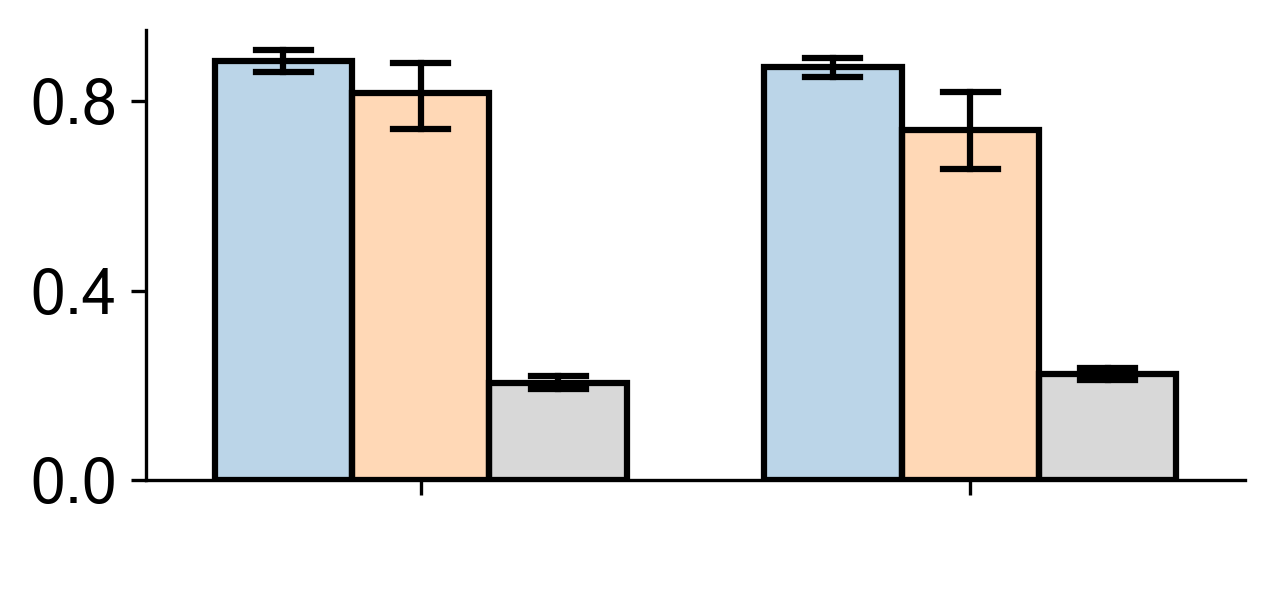

In [23]:


from utils import save_pkl, read_pkl
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 15
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
# plt.rc('font',family='Times New Roman')
from matplotlib.colors import to_rgba

fig, ax = plt.subplots(1, 1 , figsize=(4.5,2.3))

subj_lst = ['chatgpt','en subj','binary gold',  'random']
df = {'subj':[], 'value':[], 'type': []}
for idx, score in enumerate(gpt_behavior_explained):
    if idx < 12:
        df['value'].extend([score[0], score[1], np.mean(score[-1])])
        df['subj'].extend( ['chatgpt','human','chance'])
        df['type'].extend(['en']*3)
    else:
        df['value'].extend([score[0], np.mean(score[-1])])
        df['subj'].extend( ['chatgpt', 'chance'])
        df['type'].extend(['en']*2)

for idx, score in enumerate(gpt_behavior_explained_zh):
    if idx < 12:
        df['value'].extend([score[0], score[1], np.mean(score[-1])])
        df['subj'].extend( ['chatgpt','human','chance'])
        df['type'].extend(['zh']*3)
    else:
        df['value'].extend([score[0], np.mean(score[-1])])
        df['subj'].extend( ['chatgpt', 'chance'])
        df['type'].extend(['zh']*2)
df = pd.DataFrame.from_dict(df)


sns.set_context(rc = {'patch.linewidth': 1.5})
palette = {'chatgpt':'#1f77b4',
           'human': '#ff7f0e',
           'gold': '#2ca02c',
           'chance': 'grey'}


g = sns.barplot(data = df, x='type', y='value', hue='subj',  ax=ax, 
                palette=palette,
                errorbar = ('ci', 95),  
                estimator=np.mean, ci=95, capsize=.1, 
                errwidth=1.5, errcolor = 'k', 
                edgecolor='k', width=0.75, 
                )
hue_nums = df.groupby("type")["subj"].nunique().values
print(hue_nums)


color_lst = ['#1f77b4',
    '#ff7f0e',
    'grey',]


for i, bar in enumerate(g.patches):

    x_category = np.repeat(np.arange(max(hue_nums)), len(hue_nums))[i]
    hue_category = np.tile(np.arange(max(hue_nums)), len(hue_nums))[i]
    color = color_lst[x_category]
    # 根据类别设置柱子的填充颜色和透明度
    bar.set_facecolor(to_rgba(color, 0.3))
    # 根据类别设置柱子的边缘颜色和透明度
    bar.set_edgecolor((0, 0, 0, 1))
sns.despine(top=True, right=True, left=False, bottom=False)
g.set(ylabel='')
g.set(xlabel='  ')

g.set(ylabel='Size')
g.set(xlabel='   ')
g.set(xticklabels=[])
g.set(yticks=[0, 0.4, 0.8])
g.set(ylim=(0,0.95))
plt.ylabel("")
plt.xlabel(r"   ") 


plt.legend([],[], frameon=False)
# print(annotate(df))
# plt.suptitle(grained[grained_type])
plt.tight_layout()


### behavior of human

[3 3]


/tmp/ipykernel_472319/1902593306.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  g = sns.barplot(data = df, x='type', y='value', hue='subj',  ax=ax,


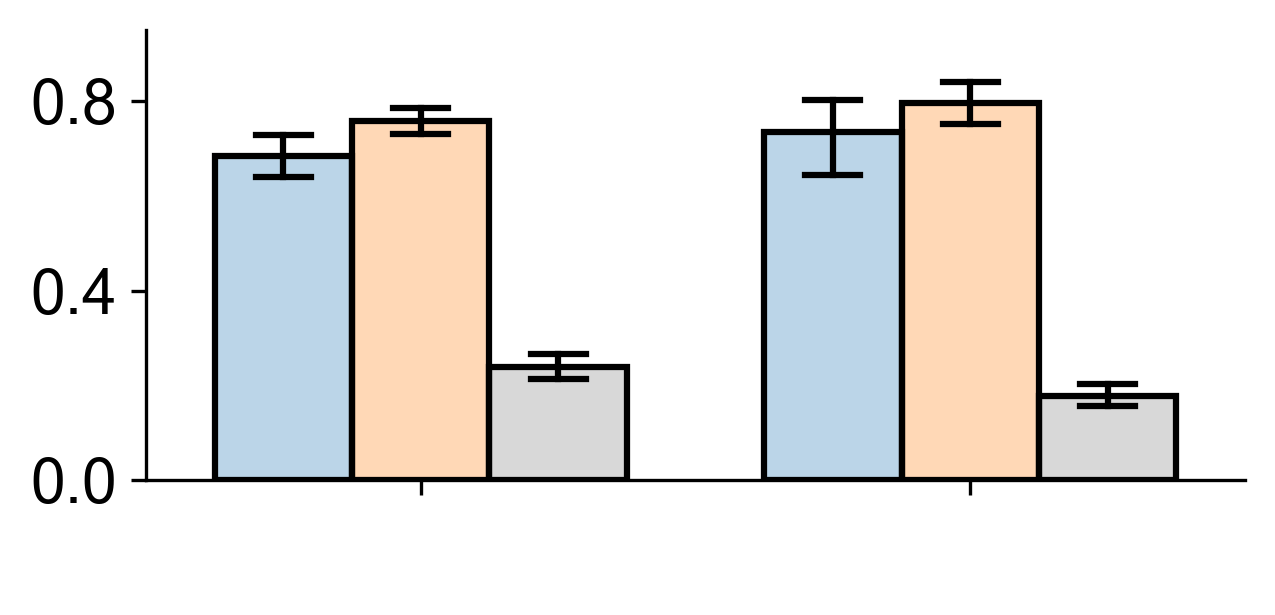

In [24]:


from utils import save_pkl, read_pkl
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 15
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
# plt.rc('font',family='Times New Roman')
from matplotlib.colors import to_rgba

fig, ax = plt.subplots(1, 1 , figsize=(4.5,2.3))

subj_lst = ['chatgpt','en subj','binary gold',  'random']
df = {'subj':[], 'value':[], 'type': []}
for idx, score in enumerate(human_behavior_explained):
    df['value'].extend([score[0], score[1], np.mean(score[-1])])
    df['subj'].extend( ['chatgpt','human','chance'])
    df['type'].extend(['en']*3)


for idx, score in enumerate(human_behavior_explained_zh):
    df['value'].extend([score[0], score[1], np.mean(score[-1])])
    df['subj'].extend( ['chatgpt','human','chance'])
    df['type'].extend(['zh']*3)

df = pd.DataFrame.from_dict(df)


sns.set_context(rc = {'patch.linewidth': 1.5})
palette = {'chatgpt':'#1f77b4',
           'human': '#ff7f0e',
           'gold': '#2ca02c',
           'chance': 'grey'}


g = sns.barplot(data = df, x='type', y='value', hue='subj',  ax=ax, 
                palette=palette,
                errorbar = ('ci', 95),  
                estimator=np.mean, ci=95, capsize=.1, 
                errwidth=1.5, errcolor = 'k', 
                edgecolor='k', width=0.75, 
                )
hue_nums = df.groupby("type")["subj"].nunique().values
print(hue_nums)


color_lst = ['#1f77b4',
    '#ff7f0e',
    'grey',]


for i, bar in enumerate(g.patches):

    x_category = np.repeat(np.arange(max(hue_nums)), len(hue_nums))[i]
    hue_category = np.tile(np.arange(max(hue_nums)), len(hue_nums))[i]
    color = color_lst[x_category]
    # 根据类别设置柱子的填充颜色和透明度
    bar.set_facecolor(to_rgba(color, 0.3))
    # 根据类别设置柱子的边缘颜色和透明度
    bar.set_edgecolor((0, 0, 0, 1))
sns.despine(top=True, right=True, left=False, bottom=False)
g.set(ylabel='')
g.set(xlabel='  ')

g.set(ylabel='Size')
g.set(xlabel='   ')
g.set(xticklabels=[])
g.set(yticks=[0, 0.4, 0.8])
g.set(ylim=(0,0.95))
plt.ylabel("")
plt.xlabel(r"   ") 


plt.legend([],[], frameon=False)
# print(annotate(df))
# plt.suptitle(grained[grained_type])
plt.tight_layout()


## Balance factor

/tmp/ipykernel_472319/3226576466.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  g = sns.barplot(data = df, x='class', y='value', hue='subj', ax=ax,


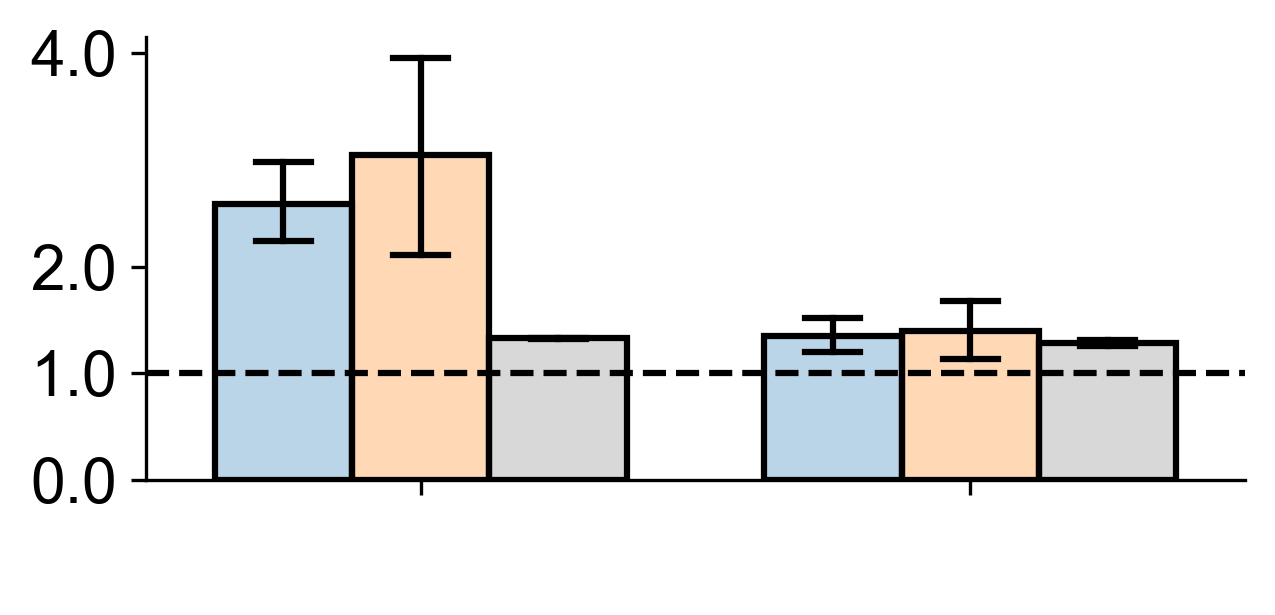

In [25]:


import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 15
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
# plt.rc('font',family='Times New Roman')

# fig, ax = plt.subplots(1, 1 , figsize=(4.35,2.3))
fig, ax = plt.subplots(1, 1 , figsize=(4.5,2.3))

df = {'type':[], 'value':[],'subj':[], 'class':[]}
subj_lst = ['chatgpt','human','chance']
for tree_lst, model_name in zip([gpt_tree_lst, human_tree_lst,chance_lst],
                      subj_lst):

    if model_name == 'chance':
        for chance_tree in tree_lst:
            left_lst, right_lst, ratio_lst = measure_left_right_size(chance_tree)
            df['type'].append('ratio')
            df['value'].append(np.mean(ratio_lst))
            df['subj'].append(model_name)
            df['class'].append('en')
        continue
    left_lst, right_lst, ratio_lst = measure_left_right_size(tree_lst)

    df['type'].extend(['ratio']*len(ratio_lst))
    df['value'].extend(ratio_lst)
    df['subj'].extend([model_name]*len(ratio_lst))
    df['class'].extend(['en']*len(ratio_lst))

for tree_lst, model_name in zip([gpt_tree_lst_zh, human_tree_lst_zh, chance_lst_zh],
                      subj_lst):

    if model_name == 'chance':
        for chance_tree in tree_lst:
            left_lst, right_lst, ratio_lst = measure_left_right_size(chance_tree)
            df['type'].append('ratio')
            df['value'].append(np.mean(ratio_lst))
            df['subj'].append(model_name)
            df['class'].append('zh')
        continue
    left_lst, right_lst, ratio_lst = measure_left_right_size(tree_lst)

    df['type'].extend(['ratio']*len(ratio_lst))
    df['value'].extend(ratio_lst)
    df['subj'].extend([model_name]*len(ratio_lst))
    df['class'].extend(['zh']*len(ratio_lst))

df = pd.DataFrame.from_dict(df)
palette = {
    
    'left': '#344CB7',
    'right': '#DD4A48',
    'ratio': 'grey'
}

sns.set_context(rc = {'patch.linewidth': 1.5})

g = sns.barplot(data = df, x='class', y='value', hue='subj', ax=ax, 
                # palette=palette,
                errorbar = ('ci', 95),  
                estimator=np.mean, ci=95, capsize=.1, 
                errwidth=1.5, errcolor = 'k', 
                edgecolor='k', width=0.75, 
                # width=0.55, 
                # palette=palette
                )
ax.axhline(y=1, xmin=0., xmax=1,ls='--',c='k')

sns.despine(top=True, right=True, left=False, bottom=False)
g.set(ylabel='')
g.set(xlabel='  ')

g.set(yticks=[0,1,2,4])
g.set(yticklabels=['0.0','1.0','2.0','4.0'])
g.set(ylabel='Size')
g.set(xlabel='   ')
g.set(xticklabels=[])


color_lst = ['#1f77b4',
    '#ff7f0e',
    'grey',]
hue_nums = df.groupby("class")["subj"].nunique().values

for i, bar in enumerate(g.patches):

    x_category = np.repeat(np.arange(max(hue_nums)), len(hue_nums))[i]
    hue_category = np.tile(np.arange(max(hue_nums)), len(hue_nums))[i]
    color = color_lst[x_category]
    bar.set_facecolor(to_rgba(color, 0.3))
    bar.set_edgecolor((0, 0, 0, 1))
plt.ylabel("")
plt.xlabel(r"   ") 


plt.legend([],[], frameon=False)

plt.tight_layout()
